# K-means Clustering for Wine Classification

This notebook implements the K-means clustering algorithm from scratch and applies it to a wine dataset to identify natural groupings based on wine characteristics.

In [14]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


%matplotlib inline

## K-means Implementation

Below

In [70]:
# My implementation of K-means clustering
class KMeansCluster:
    def __init__(self, k=3, max_iters=100):
        # Initialize with number of clusters and max iterations
        self.k = k
        self.max_iters = max_iters
        self.centers = None
        self.labels = None
        
    def random_centers(self, data):
        centers = []
        for _ in range(self.k):
            random_point = data.sample(1).iloc[0]
            centers.append(random_point)
        
        #transposing this to make it work with my other functions
        return pd.DataFrame(centers).T
    
    def get_distance(self, data, center):
        return np.sqrt(((data - center) ** 2).sum(axis=1))
    
    def find_closest_centers(self, data, centers):
        all_distances = pd.DataFrame()
        
        for i in range(centers.shape[1]):
            this_center = centers.iloc[:, i]
            all_distances[i] = self.get_distance(data, this_center)
        return all_distances.idxmin(axis=1)
    
    def recalculate_centers(self, data, labels):
        new_centers = pd.DataFrame()
        
        for i in range(self.k):
            points_in_cluster = data[labels == i]
            
            if len(points_in_cluster) == 0:
                new_centers[i] = self.centers.iloc[:, i]
            else:
                new_centers[i] = points_in_cluster.mean()
                
        return new_centers
    
    def run(self, data):
        
        # Starting with random centers
        self.centers = self.random_centers(data)
        iter_count = 0
        
        # Looping until convergence
        while iter_count < self.max_iters:
            
            old_centers = self.centers.copy()
            self.labels = self.find_closest_centers(data, self.centers)
            self.centers = self.recalculate_centers(data, self.labels) #recalculating centers
            
            #to cheeck if centers haven't moved
            if self.centers.equals(old_centers):
                print(f"Done! Converged after {iter_count+1} iterations")
                break
                
            iter_count += 1
            
        return self
    
    def show_clusters(self, data):
        #visualization with PCA
        # sqiishinghigh-dimensional data to 2D
        pca = PCA(n_components=2)
        data_2d = pca.fit_transform(data)
        centers_2d = pca.transform(self.centers.T)
        
        
        plt.figure(figsize=(10, 6))
        plt.scatter(
            data_2d[:, 0], 
            data_2d[:, 1], 
            c=self.labels,  
            cmap='viridis', 
            alpha=0.8,  
            s=50  
        )
        
        #centers as X markers
        plt.scatter(
            centers_2d[:, 0], 
            centers_2d[:, 1], 
            c='red', 
            marker='X', 
            s=200, 
            label='Cluster Centers'
        )
        
        
        plt.title('Wine Clusters', fontsize=15)
        plt.xlabel('PC1', fontsize=12)
        plt.ylabel('PC2', fontsize=12)
        plt.legend()
        plt.grid(alpha=0.3)  
        plt.colorbar(label='Cluster')
        
        plt.show()

## Data Preparation/preprocessing 


In [77]:
def prep_data(filename):
    df = pd.read_csv(filename)
    df = df.astype(float)
    scaled_df = (df - df.min()) / (df.max() - df.min())
    return scaled_df
    
wine_data = prep_data("C:\\Users\\Niyathi\\Downloads\\Clustering_Data.csv")
wine_data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341,0.0
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642,0.0
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933,0.0
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347,0.0
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963,0.0


## Save True Labels 



In [81]:
if "Customer_Segment" in wine_data.columns:
    true_labels = wine_data["Customer_Segment"]
    wine_data = wine_data.drop("Customer_Segment", axis=1)

## Run K-means Clustering


In [83]:
# Create and run K-means
kmeans = KMeansCluster(k=3)  # Using 3 clusters
kmeans.run(wine_data)

Done! Converged after 5 iterations


## Visualize Clusters

to visualize the clusters we've found using PCA to reduce it to 2D

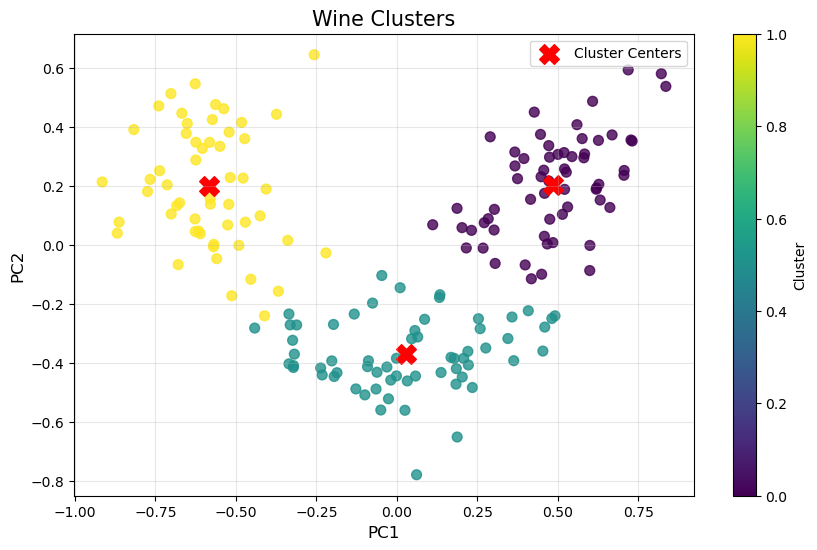

In [84]:
# Show the results
kmeans.show_clusters(wine_data)

## Evaluating out Clustering Results


In [87]:

for cluster_id in range(kmeans.k):
    cluster_mask = kmeans.labels == cluster_id
    print(f"Cluster {cluster_id} contains:")
    print(true_labels[cluster_mask].value_counts())
    print()

Cluster 0 contains:
Customer_Segment
0.0    59
0.5     2
Name: count, dtype: int64

Cluster 1 contains:
Customer_Segment
0.5    63
Name: count, dtype: int64

Cluster 2 contains:
Customer_Segment
1.0    48
0.5     6
Name: count, dtype: int64

